# Logistic Regression : Very important

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

In [3]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
 
# input = 2, output = 1 
W = tf.Variable(tf.random_normal([2,1]), name='weight')
# output = 1
b = tf.Variable(tf.random_normal([1]), name='bias')

### Hypothesis

In [5]:
# sigmoid function 은 우리의 가설 H(X) = 1/(1+e^(-w.transpose * X))
# tf.div(1., tf.exp(tf.matmul(X, W) + b)) 와 같음
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [6]:
# 새롭게 정의된 오차함수
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * (tf.log(1 - hypothesis)))
 
# 학습 그래프 최적화 알고리즘 경사하강법
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) 
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
 
# 예측값 H(X) > 0.5 is true, else false
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
# 0이나 1의 값을 트레이닝 횟수만큼 평균치 계산
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

### Train !

In [7]:
sess = tf.InteractiveSession()

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
vcost = []

In [10]:
for step in range(10001):
    cost_val,  _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
    vcost.append(cost_val)
    if step % 1000 == 0:
        print(step, '\t', cost_val)

0 	 4.407217
1000 	 0.2823785
2000 	 0.11949498
3000 	 0.06134874
4000 	 0.034699738
5000 	 0.020524476
6000 	 0.012404545
7000 	 0.0075782333
8000 	 0.0046554687
9000 	 0.0028683047
10000 	 0.0017700521


### Test !

In [11]:
sess.run(hypothesis,feed_dict={X:[[5,3]]} )

array([[0.9999842]], dtype=float32)

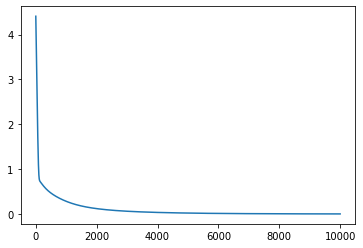

In [12]:
plt.plot(vcost)